In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
from matplotlib import pyplot as plt
from itertools import compress
from sklearn.metrics.pairwise import cosine_similarity
from feature_selection import FilterMethodCorrelatedFeatues
from sklearn.ensemble import RandomForestClassifier

In [2]:
obj1 = FilterMethodCorrelatedFeatues('../data/dataset_2.csv')

In [3]:
obj1.dataframe_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 109 entries, var_1 to var_109
dtypes: float64(108), int64(1)
memory usage: 41.6 MB


In [4]:
obj1.dataframe_stats()

           count       mean       std           min       25%        50%  \
var_1    50000.0   4.704039  1.720424 -9.783926e-07  3.677419   4.704951   
var_2    50000.0   6.880031  2.389773 -3.471477e-07  5.349017   6.825840   
var_3    50000.0  11.514358  6.596539 -9.814835e-07  5.420063  13.760467   
var_4    50000.0   3.892582  0.678187 -7.494901e-07  3.469558   3.873594   
var_5    50000.0   2.048636  0.871068  4.039061e-07  1.461370   1.878110   
...          ...        ...       ...           ...       ...        ...   
var_105  50000.0   6.975261  1.219799  7.369675e-07  6.196721   7.025433   
var_106  50000.0   1.550717  0.542883 -9.452659e-07  1.204462   1.483185   
var_107  50000.0   1.660071  1.075348 -9.775950e-07  0.967742   1.516666   
var_108  50000.0   1.804478  1.339689 -9.578620e-07  1.008315   1.273522   
var_109  50000.0   2.296217  1.342662 -5.863368e-07  1.544505   2.068721   

               75%        max  
var_1     5.682472  20.000000  
var_2     8.268947  19.

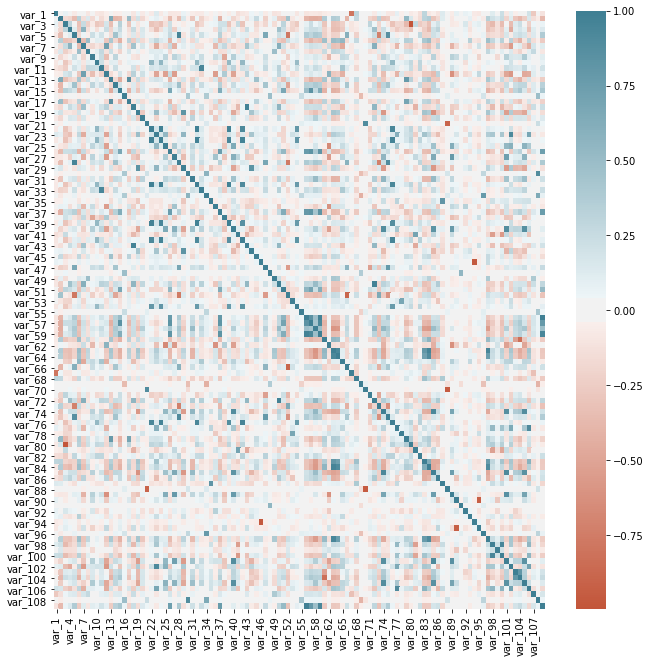

In [5]:
obj1.visualize_corr(target='target')

In [6]:
correlated_columns=obj1.correlation_brute_force(target='target')

----------Correlated Features Summary---------------
There are a total of 66 correlated features
----------------------------------------------------
Train Shape before drop (15000, 108)
Train Shape after drop (15000, 68)
Test Shape before drop (35000, 108)
Test Shape after drop (35000, 68)
----------------------------------------------------
The correlation beteen var_17 and var_13 is 0.863
The correlation beteen var_24 and var_22 is 0.981
The correlation beteen var_28 and var_5 is 0.954
The correlation beteen var_29 and var_19 is 0.834
The correlation beteen var_32 and var_22 is 0.99
The correlation beteen var_32 and var_24 is 0.98
The correlation beteen var_33 and var_11 is 0.944
The correlation beteen var_39 and var_22 is 0.974
The correlation beteen var_39 and var_24 is 0.943
The correlation beteen var_39 and var_32 is 0.975
The correlation beteen var_42 and var_22 is 0.919
The correlation beteen var_42 and var_24 is 0.967
The correlation beteen var_42 and var_32 is 0.92
The corre

In [7]:
correlated_features_list = obj1.correlation_group_features(target='target')

Here we get a list of corelated features which we can then play around with
Lets form the groups 
Displaying one such group of faetrues

In [8]:
correlated_features_list[correlated_features_list['group']==8]

,feature1,feature2,corr,group
10,var_22,var_24,0.981,8
11,var_22,var_32,0.990,8
12,var_22,var_39,0.974,8
13,var_22,var_42,0.919,8
14,var_22,var_76,0.932,8


Read in the dataset

In [9]:
df=pd.read_csv('../data/dataset_2.csv')
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'),
                                                            df['target'],
                                                            test_size=0.3, 
                                                            random_state = 0
                                                           )

Now we have groups of correlted features as well as the dataframe 
we will determine most important feature in each group and remove the rest

In [10]:
# add all features of the group to a list
drop_list = []
for i in correlated_features_list['group'].unique():
    features = list(correlated_features_list['feature2'][correlated_features_list['group']==i])
    features.append(correlated_features_list['feature1'][correlated_features_list['group']==i].unique()[0])
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train[features].fillna(0), y_train)
    importance = pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)], axis=1)
    importance.columns = ['feature', 'importance']
    importance.sort_values(by='importance', ascending=False)
    flat_list = list(importance['feature'][1:])
    for feature in flat_list:
        drop_list.append(feature)
        
        
        

In [11]:
print('Before drop train '+str(np.shape(X_train)))
print('Before drop test '+str(np.shape(X_test)))
X_train.drop(drop_list,inplace=True,axis=1)
X_test.drop(drop_list,inplace=True,axis=1)
print('After drop train '+str(np.shape(X_train)))
print('After drop test '+str(np.shape(X_test)))

Before drop train (35000, 108)
Before drop test (15000, 108)
After drop train (35000, 61)
After drop test (15000, 61)
